# This is script implement approximate using pseudo inverse matrix  

# Name : Jee-Hye Yang

# Student ID : 20145708

# GitHub address :  https://github.com/geehyeS2/assignment08

### import packages for plottion graphs and manipulating data:

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin

### upload mnist_train and test file and save the vector as an array.

In [76]:
size_row    = 28    # height of the image
size_col    = 28    # width of the image
alpha = 0

train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")
traindata = np.array(train)
testdata = np.array(test)
label = [] 

### If there is a matrix whose entire column is 0, remove it from the data set.

In [77]:
#
# Outputs index to columns whose pixel values do not change.
#
for i in range(traindata.shape[1]):
    if np.unique(traindata.T[i]).shape[0]==1:
        label.append(i)
        
traindata = np.delete(traindata, label, axis=1)
testdata = np.delete(testdata,label, axis=1)

#
# distinguish x and y.
# y is the label.
#
train_y, train_x = np.split(traindata, [1], axis=1)
test_y, test_x = np.split(testdata, [1], axis=1)

train_y = np.where(train_y.astype(int)==0, 1, -1)
test_y = np.where(test_y.astype(int)==0, 1, -1)

In [78]:
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - data.min()) / (data.max() - data.min())
    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)


    
#
# Defined an approximation function using sudo inverse.
# X : number of sample * feature(pixel) -> (matrix)
# y : sample * 1  -> (matrix)
#
def approximation(X, y):
    X = normalize(X)
    k = np.dot(np.dot(lin.inv(np.dot(X.T,X)), X.T), y)
    return (k)

#
# Defined the sign function.
#
def sign(data, alpha = 0):
    return np.where(data>=alpha, 1, -1)

In [79]:
#
# get train x and y using approximation function
#

appr = approximation(train_x, train_y)


#
# Defined predict function using sign function
#


def predict(test_x):
    return sign(np.dot(normalize(test_x), appr),alpha)

#
# using sign function get y_predict
#
y_predict = predict(test_x)



#
# Defined index
#
TP = []
TN = []
FP = []
FN = []

#
#
#
#
# True positive if the predicted value and the resulting value are equal to 1.
# True Nagative if the predicted value is -1 and the result is the same as the predicted value.
# False Positive if the predicted value is 1 and the resultant value is not the same as the predicted value.
# else False Nagative.
#
#
#
#
for i in range(y_predict.shape[0]):
    
    if y_predict[i] == 1 and y_predict[i] == test_y[i]:
        TP.append(i)
        
    elif y_predict[i] == -1 and y_predict[i] == test_y[i]:
        TN.append(i)
        
    elif y_predict[i] == 1 and y_predict[i] != test_y[i]:
        FP.append(i)
        
    else:
        FN.append(i)
        
test = np.array(test)
_, test = np.split(test, [1], axis=1)


TP_img = np.zeros(test.shape[1])
TN_img = np.zeros(test.shape[1])
FP_img = np.zeros(test.shape[1])
FN_img = np.zeros(test.shape[1])

for i in TP:
    TP_img += test[i]/len(TP)
    
for i in TN:
    TN_img += test[i]/len(TN)

for i in FP:
    FP_img += test[i]/len(FP)

for i in FN:
    FN_img += test[i]/len(FN)

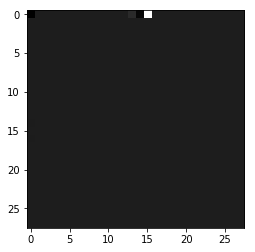

[-7.75318435e+16  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  3.54082435e+16 -5.70786396e+16  6.06235999e+17
 -1.28447328e+03  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.70647681e+02 -4.09343167e+00 -1.41268535e+00
  3.63233477e-01 -9.19686240e-02  4.94181993e-02  1.43035447e-01
 -1.69690914e-01  4.06273606e-01 -6.27908934e-01  1.50110125e-01
 -7.35016854e-02  1.01609047e-01 -1.98099617e-01  2.53798345e-02
  9.46809244e-01 -2.23783471e+00  1.12136614e+00  4.22500071e+00
 -2.06994077e+02  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.59905300e+01
  4.11522381e+00  1.74703

In [80]:
#
#  defined plot function
#

def plot(index):
    temp = np.zeros(784)
    j=0
    for i in range(784):
        if i in index:
            j += 1
            temp[i] = 0
        elif i-j>=717:
            temp[i] = 0
        else:
            temp[i] = appr[i-j]
    plt.imshow(temp.reshape(28,28), cmap = "gray")
    plt.show()

    print(temp)

    
plot(label) #sudo inverse -> parameter





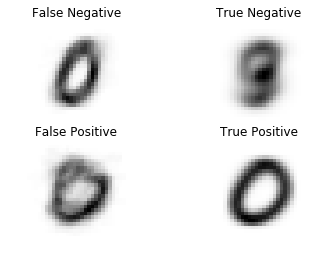

In [81]:
#
# Show image.
#
f = plt.figure(1)



P1 = plt.subplot(2, 2, 1)
P1.set_title('False Negative')
plt.imshow(FN_img.reshape((28,28)), cmap='Greys') 
plt.axis('off')

P2 = plt.subplot(2, 2, 2)
P2.set_title('True Negative')
plt.imshow(TN_img.reshape((28,28)), cmap='Greys') 
plt.axis('off')

P3 = plt.subplot(2, 2, 3)
P3.set_title('False Positive')
plt.imshow(FP_img.reshape((28,28)), cmap='Greys') 
plt.axis('off')

P4 = plt.subplot(2, 2, 4)
P4.set_title('True Positive')
plt.imshow(TP_img.reshape((28,28)), cmap='Greys') 
plt.axis('off')


plt.show()
